In [1]:
from shapely.geometry import Point

In [2]:
import networkx as nx

In [3]:
import peartree as pt
import osmnx as ox
import geopandas as gpd

In [4]:
import matplotlib.pylab as plt

In [5]:
import partridge as ptg

In [6]:
import numpy as np
import pandas as pd
import datetime

In [7]:
pd.set_option("display.max_rows",10)

In [8]:
inpath = "tisseo_gtfs.zip"

In [9]:
fd=ptg.load_feed(inpath)

## Lire la structure de GTFS

In [10]:
fd.agency

agency_id agency_name            agency_url agency_timezone  \
0  6192449487677451      Tisséo  http://www.tisseo.fr    Europe/Paris   

     agency_phone agency_lang  
0  05 61 41 70 70          fr

In [11]:
fd.trips

trip_id        service_id           route_id  \
0      4503603929098613  4503603929098613  11821953316814915   
1      4503603929098614  4503603929098613  11821953316814915   
2      4503603929098615  4503603929098613  11821953316814915   
3      4503603929098616  4503603929098613  11821953316814915   
4      4503603929098617  4503603929098613  11821953316814915   
...                 ...               ...                ...   
22546  4503603929179198  4503603929179166  11821953316814915   
22547  4503603929179199  4503603929179166  11821953316814915   
22548  4503603929179200  4503603929179166  11821953316814915   
22549  4503603929179201  4503603929179166  11821953316814915   
22550  4503603929179202  4503603929179166  11821953316814915   

                           trip_headsign  direction_id          shape_id  
0                    Balma-Gramont BALMA             0  4503603929098613  
1                    Balma-Gramont BALMA             0  4503603929098613  
2                    Balma-Gramont BALMA             0  4503603929098613  
3                    Balma-Gramont BALMA             0  4503603929098613  
4                    Balma-Gramont BALMA             0  4503603929098613  
...                                  ...           ...               ...  
22546  Mondouzil ZA Les Landes MONDOUZIL             1  4503603929101602  
22547  Mondouzil ZA Les Landes MONDOUZIL             1  4503603929101602  
22548  Mondouzil ZA Les Landes MONDOUZIL             1  4503603929101602  
22549  Mondouzil ZA Les Landes MONDOUZIL             1  4503603929101602  
22550  Mondouzil ZA Les Landes MONDOUZIL             1  4503603929101602  

[22551 rows x 6 columns]

In [12]:
fd.stops

stop_id stop_code           stop_name  stop_lat  stop_lon  \
0     3377699720880573      2211   Ecole Croix-Rouge   43.6052   1.38708   
1     3377699720880578      4531  Matabiau Gare SNCF   43.6109   1.45271   
2     3377699720880579     40130        Marengo-SNCF   43.6101   1.45562   
3     3377699720880580     40131        Marengo-SNCF   43.6102   1.45553   
4     3377699720880581      4481        Marengo-SNCF   43.6108   1.45539   
...                ...       ...                 ...       ...       ...   
3669  3377704015497108     73000              Joulin   43.5503   1.42084   
3670  3377704015497109     73001              Joulin   43.5506   1.42122   
3671  3377704015497112     15045              Peries   43.5133   1.50095   
3672  3377704015497113     20580   Ancien Tri Postal   43.5842   1.38652   
3673  3377704015497114     20581   Ancien Tri Postal   43.5845   1.38646   

      location_type    parent_station  wheelchair_boarding  
0                 0  1970324837184593                    2  
1                 0  1970324840530381                    1  
2                 0  1970324837184594                    1  
3                 0  1970324837184594                    1  
4                 0  1970324837184594                    1  
...             ...               ...                  ...  
3669              0  1970329131942546                    1  
3670              0  1970329131942546                    1  
3671              0  1970324837186501                    1  
3672              0  1970329131942548                    1  
3673              0  1970329131942548                    1  

[3674 rows x 8 columns]

In [13]:
fd.calendar

service_id  monday  tuesday  wednesday  thursday  friday  saturday  \
0    4503603929098613       0        0          1         1       1         0   
1    4503603929108287       1        1          1         1       1         0   
2    4503603929111854       1        1          1         1       1         1   
3    4503603929114550       1        1          0         1       1         0   
4    4503603929114574       0        0          1         0       0         0   
..                ...     ...      ...        ...       ...     ...       ...   
113  4503603929172379       0        1          1         0       0         1   
114  4503603929172619       1        1          0         0       1         1   
115  4503603929173468       1        1          1         1       1         1   
116  4503603929178523       0        0          1         0       0         0   
117  4503603929179166       1        1          1         1       1         0   

     sunday  start_date    end_date  
0         0  2020-01-15  2020-01-17  
1         0  2020-01-15  2020-02-05  
2         0  2020-01-15  2020-02-05  
3         0  2020-01-16  2020-02-04  
4         0  2020-01-15  2020-02-05  
..      ...         ...         ...  
113       1  2020-01-15  2020-02-05  
114       1  2020-01-17  2020-02-04  
115       1  2020-01-15  2020-02-04  
116       0  2020-01-15  2020-02-05  
117       0  2020-01-20  2020-02-05  

[118 rows x 10 columns]

In [14]:
fd.stop_times

trip_id           stop_id  stop_sequence  arrival_time  \
0       4503603929098613  3377699722882610              0       25200.0   
1       4503603929098613  3377699722882594              1       25320.0   
2       4503603929098613  3377699720890831              2       25500.0   
3       4503603929098613  3377704015497082              3       25620.0   
4       4503603929098613  3377699720888240              4       25800.0   
...                  ...               ...            ...           ...   
540195  4503603929179202  3377704015497073              1       73260.0   
540196  4503603929179202  3377704015497081              2       73440.0   
540197  4503603929179202  3377699720890831              3       73560.0   
540198  4503603929179202  3377699722882593              4       73740.0   
540199  4503603929179202  3377699722882610              5       73800.0   

        departure_time stop_headsign  pickup_type drop_off_type  \
0              25200.0           NaN            0             1   
1              25320.0           NaN            0             0   
2              25500.0           NaN            0             0   
3              25620.0           NaN            0             0   
4              25800.0           NaN            0             0   
...                ...           ...          ...           ...   
540195         73260.0           NaN            0             0   
540196         73440.0           NaN            0             0   
540197         73560.0           NaN            0             0   
540198         73740.0           NaN            0             0   
540199         73800.0           NaN            1             0   

        shape_dist_traveled  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
540195                  NaN  
540196                  NaN  
540197                  NaN  
540198                  NaN  
540199                  NaN  

[540200 rows x 9 columns]

In [15]:
fd.routes

route_id         agency_id route_short_name  \
0    11821949021891623  6192449487677451               14   
1    11821949021891624  6192449487677451               15   
2    11821949021891627  6192449487677451               19   
3    11821949021891628  6192449487677451               17   
4    11821949021891629  6192449487677451               20   
..                 ...               ...              ...   
107  11821953316814918  6192449487677451              104   
108  11821953316814919  6192449487677451               L4   
109  11821953316814920  6192449487677451             NOCT   
110  11821953316814922  6192449487677451              152   
111  11821953316814923  6192449487677451               L5   

                                 route_long_name  \
0                   Basso Cambo / Marengo - SNCF   
1             Jeanne d'Arc / États-Unis Fondeyre   
2           Borderouge / Place de l'Indépendance   
3    Andromède - Lycée / Mondonville Foyer Rural   
4               Balma - Gramont / Beaupuy Mairie   
..                                           ...   
107    Balma Ribaute / Aigrefeuille Ch. du Baric   
108                   Basso Cambo / Cours Dillon   
109                                    Noctambus   
110                                Empalot / IUC   
111                   Empalot / Portet Gare SNCF   

                                            route_desc  route_type route_url  \
0                   Ligne Basso Cambo / Marengo - SNCF           3       NaN   
1             Ligne Jeanne d'Arc / Etats-Unis Fondeyre           3       NaN   
2           Ligne Borderouge / Place de l'Indépendance           3       NaN   
3    Ligne Andromède - Lycée / Mondonville Foyer Rural           3       NaN   
4               Ligne Balma - Gramont / Beaupuy Mairie           3       NaN   
..                                                 ...         ...       ...   
107    Ligne Balma Ribaute / Aigrefeuille Ch. du Baric           3       NaN   
108                   Ligne Basso Cambo / Cours Dillon           3       NaN   
109                                    Ligne Noctambus           3       NaN   
110                                Ligne Empalot / IUC           3       NaN   
111                   Ligne Empalot / Portet Gare SNCF           3       NaN   

    route_color route_text_color  
0        bb9dc6           FFFFFF  
1        a0670f           FFFFFF  
2        58ac25           FFFFFF  
3        e46809           FFFFFF  
4        007c52           FFFFFF  
..          ...              ...  
107      e675a7           FFFFFF  
108      ff671b           FFFFFF  
109      dc006b           FFFFFF  
110      572f08           FFFFFF  
111      ff671b           FFFFFF  

[112 rows x 9 columns]

In [16]:
fd.routes["route_type"].unique() 

array([3, 1, 0])

In [17]:
fd.calendar_dates

service_id        date  exception_type
0  4503603929178523  2020-01-22               2
1  4503603929178523  2020-01-29               2
2  4503603929178523  2020-02-04               1

## Nombre de enregistement de trip 

In [18]:
n_trip=fd.trips.copy()["trip_id"].count()
n_trip

22551

In [19]:
print("debut de date de service : ",list(fd.calendar.copy()["start_date"])[0])
print("fin de date de service : ",list(fd.calendar.copy()["end_date"])[-1])

debut de date de service :  2020-01-15
fin de date de service :  2020-02-05


## Variation de nombre de trajet chaque jour

In [20]:
calendar=fd.calendar.copy()
calendar

service_id  monday  tuesday  wednesday  thursday  friday  saturday  \
0    4503603929098613       0        0          1         1       1         0   
1    4503603929108287       1        1          1         1       1         0   
2    4503603929111854       1        1          1         1       1         1   
3    4503603929114550       1        1          0         1       1         0   
4    4503603929114574       0        0          1         0       0         0   
..                ...     ...      ...        ...       ...     ...       ...   
113  4503603929172379       0        1          1         0       0         1   
114  4503603929172619       1        1          0         0       1         1   
115  4503603929173468       1        1          1         1       1         1   
116  4503603929178523       0        0          1         0       0         0   
117  4503603929179166       1        1          1         1       1         0   

     sunday  start_date    end_date  
0         0  2020-01-15  2020-01-17  
1         0  2020-01-15  2020-02-05  
2         0  2020-01-15  2020-02-05  
3         0  2020-01-16  2020-02-04  
4         0  2020-01-15  2020-02-05  
..      ...         ...         ...  
113       1  2020-01-15  2020-02-05  
114       1  2020-01-17  2020-02-04  
115       1  2020-01-15  2020-02-04  
116       0  2020-01-15  2020-02-05  
117       0  2020-01-20  2020-02-05  

[118 rows x 10 columns]

In [21]:
calendar.iloc[0]["start_date"]

datetime.date(2020, 1, 15)

In [22]:
#compter nombre de service 
dict_count={}
for i in range(len(calendar)):
    debut=calendar.iloc[i]["start_date"]
    fin=calendar.iloc[i]["end_date"]
    duree=(fin-debut).days
    for j in range(duree+1):
        week_day=(debut+datetime.timedelta(days=j)).weekday()
        if calendar.iloc[i][week_day+1]==1:
            dict_count[debut+datetime.timedelta(days=j)]=dict_count.get(debut+datetime.timedelta(days=j),0)+1

In [23]:
dict_count

{datetime.date(2020, 1, 15): 57,
 datetime.date(2020, 1, 16): 60,
 datetime.date(2020, 1, 17): 59,
 datetime.date(2020, 1, 20): 61,
 datetime.date(2020, 1, 21): 63,
 datetime.date(2020, 1, 22): 58,
 datetime.date(2020, 1, 23): 60,
 datetime.date(2020, 1, 24): 59,
 datetime.date(2020, 1, 27): 61,
 datetime.date(2020, 1, 28): 63,
 datetime.date(2020, 1, 29): 58,
 datetime.date(2020, 1, 30): 60,
 datetime.date(2020, 1, 31): 59,
 datetime.date(2020, 2, 3): 61,
 datetime.date(2020, 2, 4): 62,
 datetime.date(2020, 2, 5): 56,
 datetime.date(2020, 1, 18): 52,
 datetime.date(2020, 1, 25): 52,
 datetime.date(2020, 2, 1): 52,
 datetime.date(2020, 1, 19): 51,
 datetime.date(2020, 1, 26): 51,
 datetime.date(2020, 2, 2): 51}

/home/bestyashen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


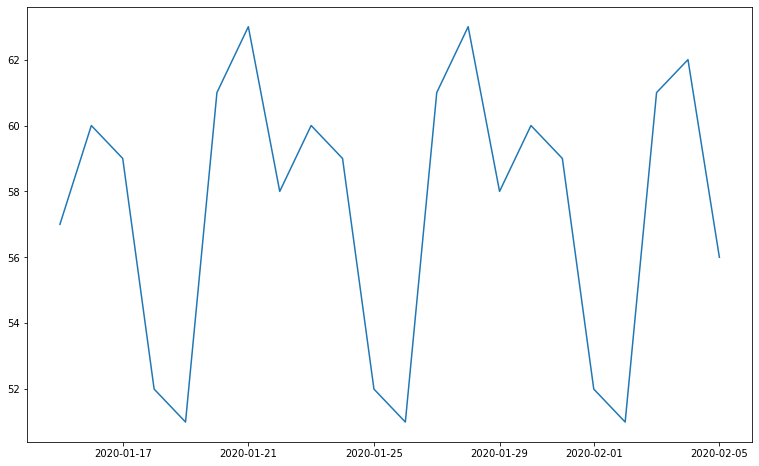

In [24]:
%matplotlib inline
plt.figure(figsize=(13,8))
lists = sorted(dict_count.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y);


## Afficher la frequence du temps d'arrive

In [25]:
f1 = fd.stop_times.copy()
f1

trip_id           stop_id  stop_sequence  arrival_time  \
0       4503603929098613  3377699722882610              0       25200.0   
1       4503603929098613  3377699722882594              1       25320.0   
2       4503603929098613  3377699720890831              2       25500.0   
3       4503603929098613  3377704015497082              3       25620.0   
4       4503603929098613  3377699720888240              4       25800.0   
...                  ...               ...            ...           ...   
540195  4503603929179202  3377704015497073              1       73260.0   
540196  4503603929179202  3377704015497081              2       73440.0   
540197  4503603929179202  3377699720890831              3       73560.0   
540198  4503603929179202  3377699722882593              4       73740.0   
540199  4503603929179202  3377699722882610              5       73800.0   

        departure_time stop_headsign  pickup_type drop_off_type  \
0              25200.0           NaN            0             1   
1              25320.0           NaN            0             0   
2              25500.0           NaN            0             0   
3              25620.0           NaN            0             0   
4              25800.0           NaN            0             0   
...                ...           ...          ...           ...   
540195         73260.0           NaN            0             0   
540196         73440.0           NaN            0             0   
540197         73560.0           NaN            0             0   
540198         73740.0           NaN            0             0   
540199         73800.0           NaN            1             0   

        shape_dist_traveled  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
540195                  NaN  
540196                  NaN  
540197                  NaN  
540198                  NaN  
540199                  NaN  

[540200 rows x 9 columns]

In [26]:
# changer la forme de temps de arrive
import datetime

In [27]:
f1['arrival_time']=f1['arrival_time'].apply(lambda x:datetime.timedelta(seconds=x))
f1

trip_id           stop_id  stop_sequence arrival_time  \
0       4503603929098613  3377699722882610              0     07:00:00   
1       4503603929098613  3377699722882594              1     07:02:00   
2       4503603929098613  3377699720890831              2     07:05:00   
3       4503603929098613  3377704015497082              3     07:07:00   
4       4503603929098613  3377699720888240              4     07:10:00   
...                  ...               ...            ...          ...   
540195  4503603929179202  3377704015497073              1     20:21:00   
540196  4503603929179202  3377704015497081              2     20:24:00   
540197  4503603929179202  3377699720890831              3     20:26:00   
540198  4503603929179202  3377699722882593              4     20:29:00   
540199  4503603929179202  3377699722882610              5     20:30:00   

        departure_time stop_headsign  pickup_type drop_off_type  \
0              25200.0           NaN            0             1   
1              25320.0           NaN            0             0   
2              25500.0           NaN            0             0   
3              25620.0           NaN            0             0   
4              25800.0           NaN            0             0   
...                ...           ...          ...           ...   
540195         73260.0           NaN            0             0   
540196         73440.0           NaN            0             0   
540197         73560.0           NaN            0             0   
540198         73740.0           NaN            0             0   
540199         73800.0           NaN            1             0   

        shape_dist_traveled  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
540195                  NaN  
540196                  NaN  
540197                  NaN  
540198                  NaN  
540199                  NaN  

[540200 rows x 9 columns]

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

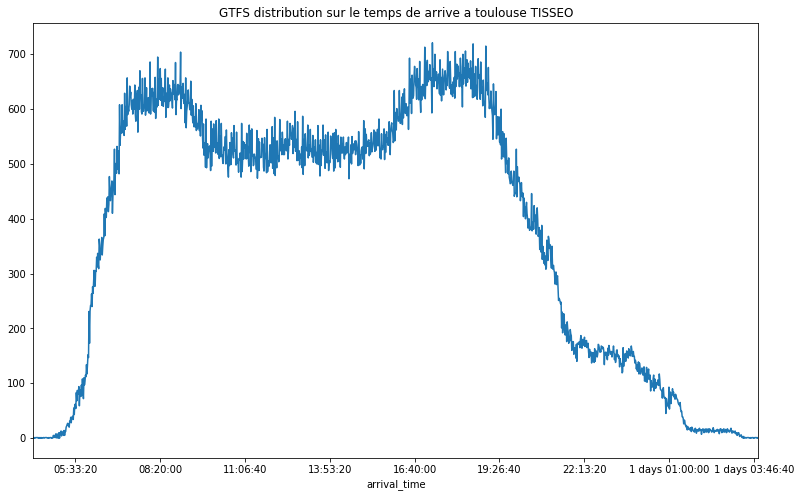

In [29]:
%matplotlib inline
plt.figure(figsize=(13,8))
plt.title('GTFS distribution sur le temps de arrive a toulouse TISSEO')
f_1T = f1.set_index(['arrival_time']).resample('1T')
f_1T.size().plot();

## Analyse le betweeness

In [30]:
feed = pt.get_representative_feed(inpath)

In [31]:
start = 0*60*60  # 0:00 AM
end = 24*60*60  # 24:00 AM

In [32]:
G = pt.load_feed_as_graph(feed, start, end)

/home/bestyashen/anaconda3/lib/python3.7/site-packages/peartree/toolkit.py:160: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
/home/bestyashen/anaconda3/lib/python3.7/site-packages/peartree/parallel.py:127: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  direction_subset = stop_times_by_stop[constraint_2]


(<Figure size 1284.96x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f43f88ccb50>)

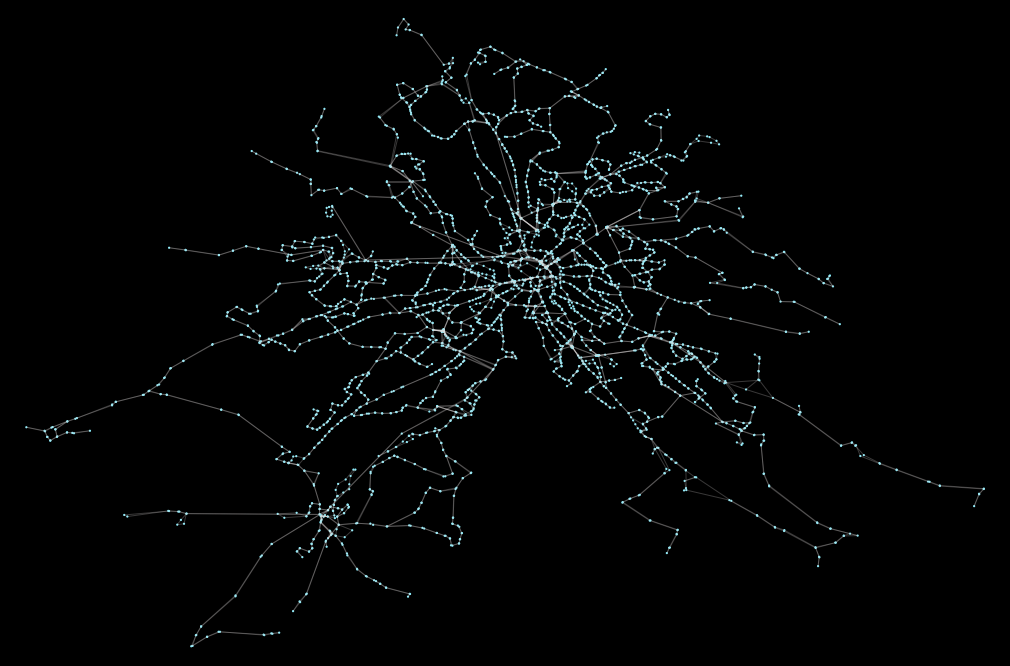

In [33]:
pt.generate_plot(G)

In [34]:
G_dir=nx.DiGraph(G)

In [35]:
nodes=nx.betweenness_centrality(G_dir)

In [36]:
nids = []
vals = []
for k in nodes.keys():
    nids.append(k)
    vals.append(nodes[k])
    
min(vals), np.array(vals).mean(), max(vals)

(0.0, 0.014634557557872824, 0.2044883965049092)

In [37]:
vals_adj = []
m = max(vals)
for v in vals:
    if v == 0:
        vals_adj.append(0)
    else:
        r = (v/m)
        vals_adj.append(r * 0.01)

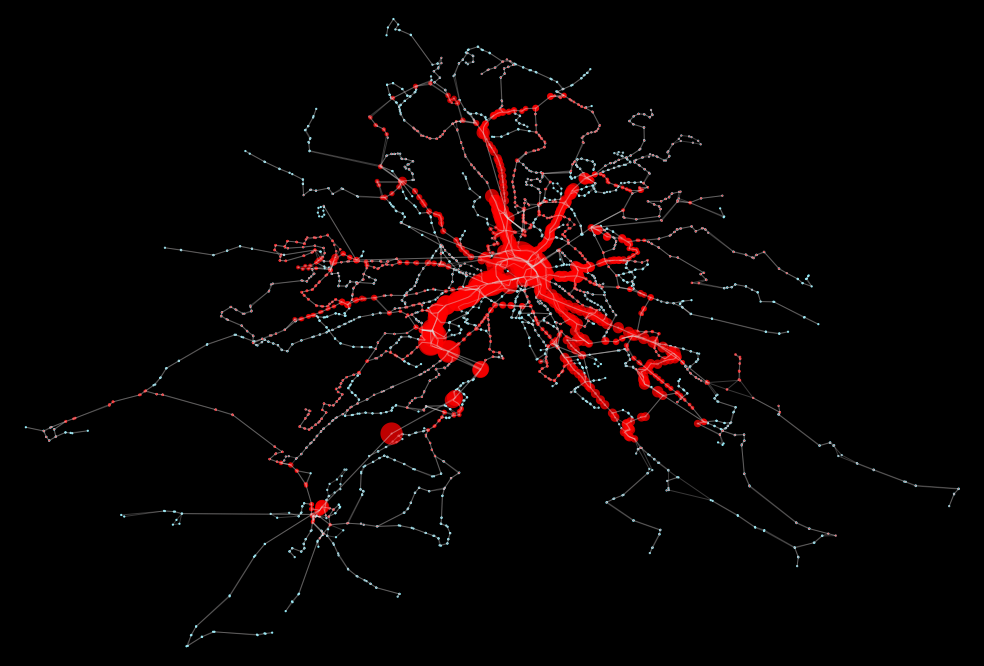

In [38]:
fig, ax = pt.generate_plot(G)

ps = []
for nid, buff_dist in zip(nids, vals_adj):
    n = G_dir.nodes()[nid]
    if buff_dist > 0:
        p = Point(n['x'], n['y']).buffer(buff_dist)
        ps.append(p)
    
gpd.GeoSeries(ps).plot(ax=ax, color='r', alpha=0.75)

In [39]:
latidude=[]
longtitude=[]

for i in range(len(G_dir.nodes())):
    latidude.append(G_dir.nodes()[nids[i]]['y'])
    longtitude.append(G_dir.nodes()[nids[i]]['x'])
    
vals_figure=[i*5000 for i in vals_adj]

In [40]:
import plotly.graph_objects as go
import plotly.offline as py
mapbox_access_token = 'pk.eyJ1IjoieWF6aSIsImEiOiJjazVudWVtaHIxYTNoM2Vxa2xha3NlM3hqIn0.HE-cx_3WOQE6tx3DPLpBFg'



fig = go.Figure(
    go.Scattermapbox(
       lat=latidude,
        lon=longtitude,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=vals_figure,
        ),
        text=['toulouse'],
    ))



fig.update_layout(
    width=1000,
    height=700,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=50,
        t=50,
    ),
    hovermode='closest',
    mapbox=go.layout.Mapbox(
       accesstoken=mapbox_access_token,
#         style="open-street-map",
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=43.6,
            lon=1.45
        ),
        pitch=0,
        zoom=12
    )
)

fig.update_layout(mapbox_style="outdoors")



fig.show()
py.plot(fig,filename='GTFS.html')

'GTFS.html'